In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


train_data = np.load('D:/HomeWork/Pattern/inputs/p4/train-ubyte.npz')
x_train, y_train = train_data['a'], train_data['b']

test_data = np.load('D:/HomeWork/Pattern/inputs/p4/test-ubyte.npz')
x_test, y_test = test_data['a'], test_data['b']

class_names = ['cloud', 'sun', 'pants', 'umbrella', 'table', 'ladder', 'eyeglasses', 'clock', 'scissors', 'cup']

In [3]:
x_train = x_train.reshape(80000 , 784)

In [4]:
x_test.shape
x_test = x_test.reshape(20000 , 784)

In [5]:
n_features = x_train.shape[1]

In [6]:
n_features

784

In [7]:
class_labels = np.unique(y_train)

In [8]:
class_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
mean_overall = np.mean(x_train, axis=0)

In [10]:
mean_overall.shape

(784,)

In [11]:
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))

In [12]:
for c in class_labels:
    X_c = x_train[y_train == c]
    mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
    SW += (np.cov(X_c.T))*(len(X_c) - 1)

            # (4, 1) * (1, 4) = (4,4) -> reshape
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
    SB += n_c * (mean_diff).dot(mean_diff.T)

In [13]:
A = np.linalg.pinv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
eigenvectors = eigenvectors.T
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
linear_discriminants = eigenvectors[0:20]

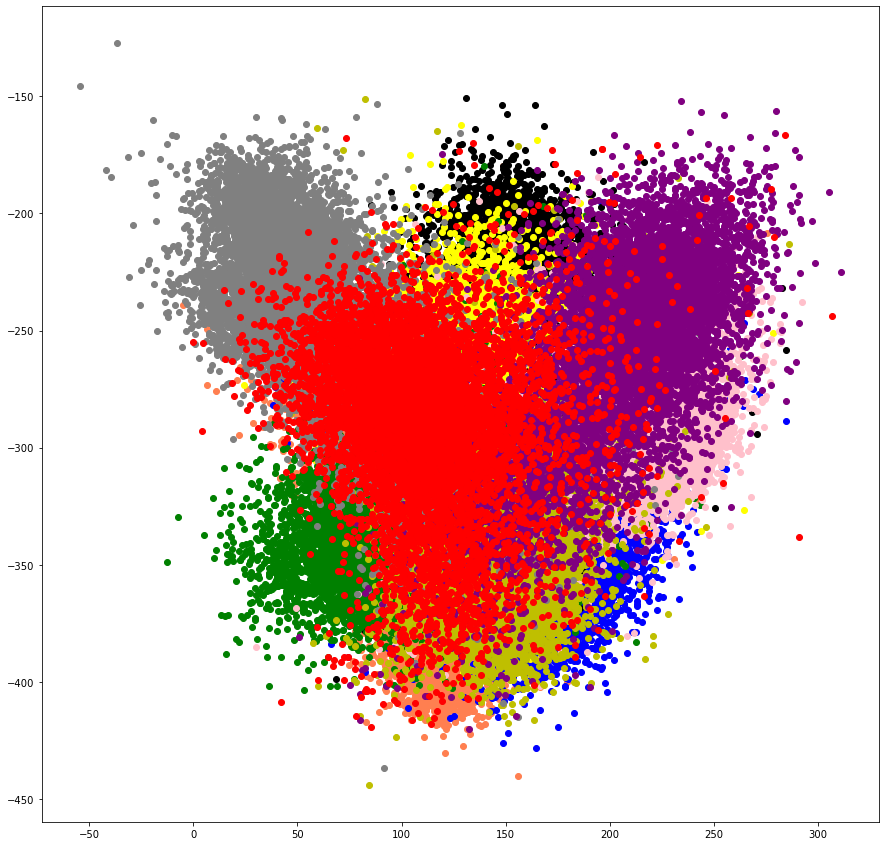

In [14]:
colors = ['coral' , 'blue' , 'black' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'red']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(len(class_labels)):
    X_c = x_train[y_train == class_labels[c]]
    k = (np.real(linear_discriminants[0])).dot(X_c.T)
    f = (np.real(linear_discriminants[1])).dot(X_c.T)
    ax.scatter(k, f, marker='o', color=colors[c])

plt.show()

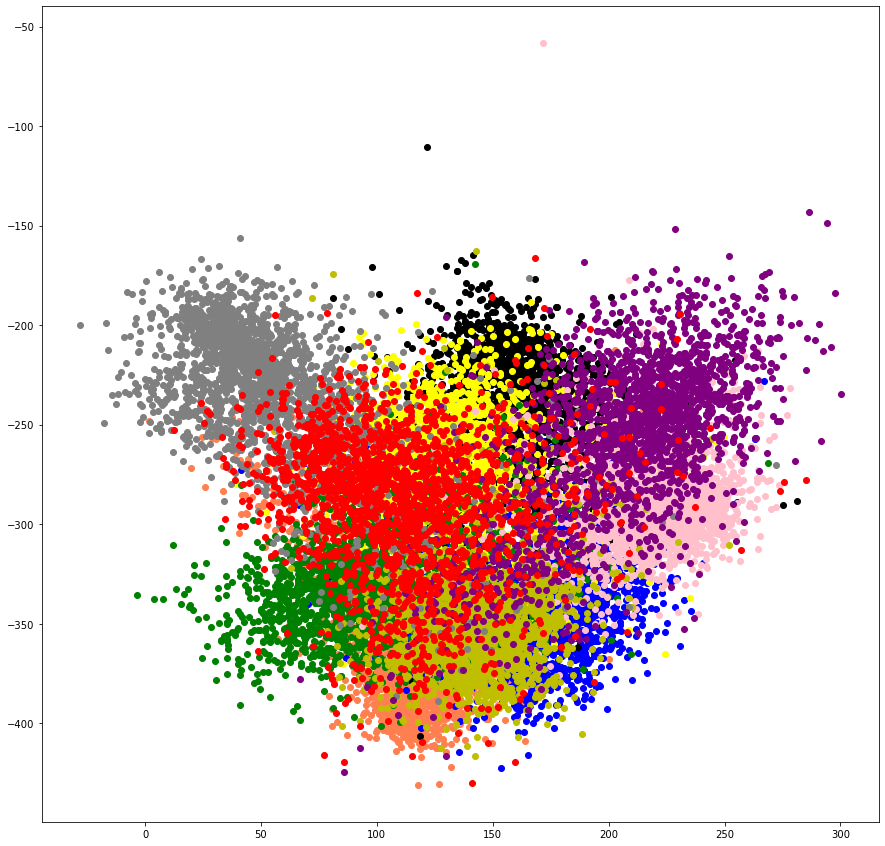

In [15]:
colors = ['coral' , 'blue' , 'black' , 'yellow' , 'green' , 'pink' , 'y' , 'gray' , 'purple' , 'red']
fig = plt.figure(figsize = (15 , 15))
ax = fig.add_subplot()
for c in range(len(class_labels)):
    X_c = x_test[y_test == class_labels[c]]
    k = (np.real(linear_discriminants[0])).dot(X_c.T)
    f = (np.real(linear_discriminants[1])).dot(X_c.T)
    ax.scatter(k, f, marker='o', color=colors[c])

plt.show()